In [2]:
import requests

res = requests.post("http://localhost:8080/predictions/cifar/1.0", files={'data': open('../cifar10_test_data/dog.png', 'rb')})

res.json()

{'dog': 1.0,
 'cat': 2.475518812161681e-08,
 'frog': 1.08763844285098e-12,
 'bird': 2.0953575788525136e-13,
 'deer': 8.81481709456497e-14}

In [5]:
res = requests.post("http://localhost:8080/explanations/cifar/1.0", files={'data': open('../cifar10_test_data/dog.png', 'rb')})

ig = res.json()

In [6]:
ig

[[[-0.0007850990512591892,
   -0.0008416724888037686,
   -0.0011862729314056067,
   -0.0008019307085246595,
   -0.0003566490548887622,
   -0.0002567351443296299,
   -0.0004018337010125795,
   -0.0009424049465612503,
   -0.000796512400086995,
   -0.0007394054304239625,
   -0.0003090441507391714,
   0.0003585128964082553,
   0.0011065922079995464,
   0.0008210386785941197,
   2.0599347489456914e-05,
   -0.0006347498487425199,
   -0.0002724517953918114,
   -0.00016921624791242366,
   -0.00016074976098198938,
   -0.00048180039734737397,
   -0.0012870816106848682,
   -0.0009994206490657885,
   -0.0007874643414544909,
   -0.00022829442144465978,
   0.00023390558915917928,
   0.0004218338666432068,
   0.0009866337863922488,
   0.0011455017335939423,
   0.0002493984690801263,
   0.00020839181813974984,
   0.0008752196305567354,
   0.0009344802445713628,
   0.0001246536441226628,
   -0.0005463303910169505,
   -0.0008943574961189473,
   -0.0018741225629085776,
   -0.0015516734789479472,
   -0.00

In [7]:
import torch
import numpy as np
import torchvision.transforms as T

from PIL import Image

from captum.attr import visualization as viz

In [11]:
img_path = "../cifar10_test_data/dog.png"

inp_image = Image.open(img_path)
to_tensor = T.Compose([
	T.Resize((224,224)),
	T.ToTensor()
])
inp_image = to_tensor(inp_image)

inp_image = inp_image.numpy()
attributions = np.array(ig)

inp_image, attributions = inp_image.transpose(1, 2, 0), attributions.transpose(1, 2, 0)

In [12]:
inp_image.shape, attributions.shape

((224, 224, 3), (224, 224, 3))

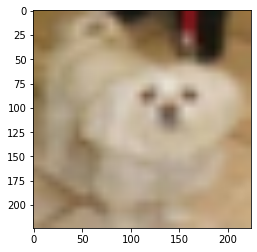

In [25]:
import matplotlib.pyplot as plt
plt.imshow(inp_image, cmap="Blues")

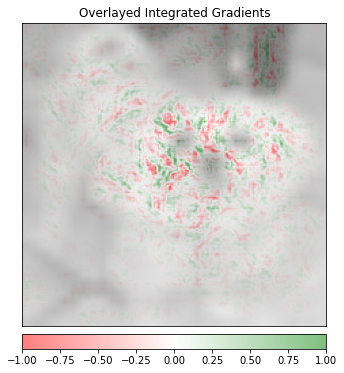

(<Figure size 432x432 with 2 Axes>,
 <AxesSubplot:title={'center':'Overlayed Integrated Gradients'}>)

In [26]:
viz.visualize_image_attr(attributions, inp_image, method="blended_heat_map",sign="all", show_colorbar=True, title="Overlayed Integrated Gradients")